<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/ML_07_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 분류분석 성능평가

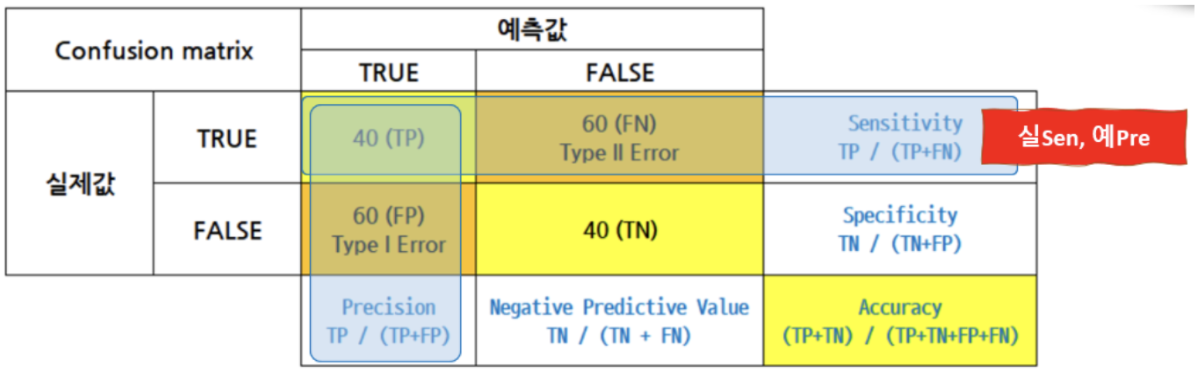

### 1. sklearn.matrics API 사용
- ```sklearn.metrics.confusion_matrix(test_y, pred)```
   - ``` return : Ci,j (i : actual, j : predicted)```
- ```sklearn.metrics.accuracy_score(test_y, pred)```
- ```sklearn.metrics.precision_score(test_y, pred)```
- ```sklearn.metrics.recall_score(test_y, pred)```
- ```sklearn.metrics.f1_score(test_y, pred)```
- precision_score, recall_score, f1_score의 average parameter에 "micro", "macro", "weighted"를 사용해 class별 sample의 수를 고려할지, 안할지, 가중치를 둘지를 정할 수 있음 (class가 binary가 아닌 경우 필수)

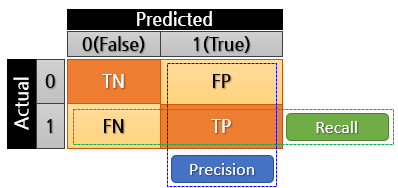

In [1]:
from sklearn.datasets import load_breast_cancer
# 암 데이터를 가져와 cancer로 이름을 지정한다
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [2]:
import pandas as pd
# 암 데이터를 가져와 cancer로 이름을 지정한다
cancer = pd.read_csv('cancer.csv')
X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]
X.shape, y.shape

FileNotFoundError: ignored

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    stratify=y,
                                                    random_state=0)


model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
print(f'train accuracy : {model.score(x_train, y_train)*100:.2f}%')
print(f'test accuracy  : {model.score(x_test, y_test) *100:.2f}%')

train accuracy : 99.06%
test accuracy  : 95.80%


In [4]:
# 예측값 구하기
pred = model.predict(x_test)
pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [5]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred)) #FN=3,FP=3,TN=50,TP=87

[[50  3]
 [ 3 87]]


In [6]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy  = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall    = recall_score(y_test, pred)
f1_score  = f1_score(y_test, pred)
print(f'accuracy : {accuracy*100:5.2f}%')
print(f'precision: {precision*100:5.2f}%')
print(f'recall   : {recall*100:5.2f}%')
print(f'f1 score : {f1_score:5.2f}')  

accuracy : 95.80%
precision: 96.67%
recall   : 96.67%
f1 score :  0.97


### 2. 그 외의 성능평가
- Specificity(특이도) : 실제 False인데 예측이 False로 된 것의 비율
   - TN / (TN + FP)
- FP Rate : 실제 False인데 예측이 True로 된 것의 비율
  - FP / (TN + FP), 1 - Specificity   

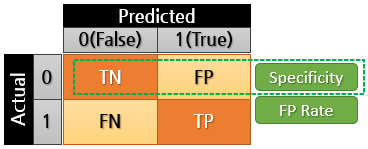

In [7]:
# 식을 사용하여 Specificity와 FP Rate를 구해본다
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_test, pred)
TN, FP = m[0]
specificity = TN/(TN+FP)
FPRate = 1 - specificity
print(m)
print(f'specificity:{specificity:.2f}, FPRate:{FPRate:.2f}')

[[50  3]
 [ 3 87]]
specificity:0.94, FPRate:0.06


In [8]:
#confusion_matrix에 대해 DataFrame 작성
cm = pd.DataFrame(m, index=['False', 'True'], columns=['False', 'True'])
cm

,False,True
False,50,3
True,3,87


- ROC(Receiver Operating Characteristics) Curve
  - 가로축을 1-specificity, 세로축을 recall로 하여 시각한 그래프
  - sklearn.metrics.roc_curve 사용
  - area가 넓을 수록 좋은 모델임
  - ```https://en.wikipedia.org/wiki/Receiver_operating_characteristic```

  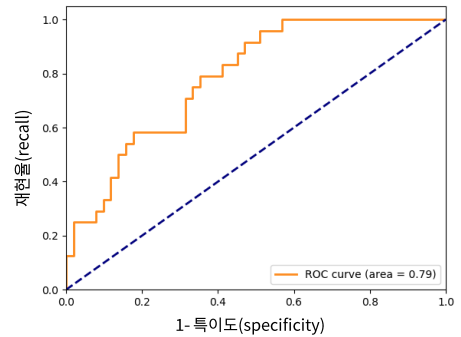

In [ ]:
"""
recall : 1에 가까울수록 좋음
1-특이도(FP Rate) : 0에 가까울수록 좋음
"""

In [9]:
# ROC curve 그래프에 필요한 데이터 준비
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_proba = model.predict_proba(x_test)[:,1] #ROC 커브까지는 시험에 안나올 듯 하고, 결과에 대한 확률값만 따로 csv에 저장하는 것들만 나올듯
FP, TP, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(FP, TP)  
#roc_auc = roc_auc_score(y_test, y_pred_proba)  # 동일 방법
print('AUC : %.3f' % (roc_auc))
print(thresholds)

AUC : 0.995
[1.99999971e+00 9.99999707e-01 9.17887920e-01 9.09127550e-01
 8.87089113e-01 8.77153469e-01 5.40164624e-01 5.28973404e-01
 4.09233172e-01 3.70905697e-01 3.19553517e-01 2.35075048e-13]


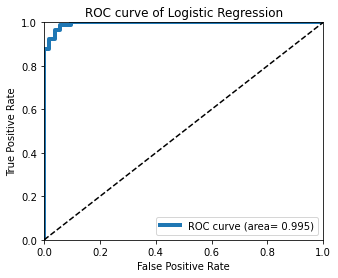

In [ ]:
import matplotlib.pyplot as plt
# ROC curve 그래프 그리기
plt.figure(figsize=(5, 4))
plt.plot(FP, TP, label='ROC curve (area= %.3f)' % roc_auc, linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')#사선그리기
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()